# **Phase 1 Project**


# Business Understanding
Analyzing Aviation data to identify patterns,risks and performance to optimize safety of the aircraft.


# Project Problem
My company wants to expand to new industries and are interested in purchasing airplanes for commercial and private enterprises. They do not know anything about the potential risks that can occur. I am charged to determine aircraft that has the lowest risks. should my findings into actionable insight that can help new aviation to decide which aircraft to purchase. The data is for the NTSB that include accident data from 1962 to 2023 in USA.

# Objectives
Identify which aircraft engine is the best for the company to consider buying

Check the progression accident over the years.

Indetify how weather can relate with accidents occurrence.




# Research Questions
1.which engine type has the lowest accident rate?

2. which is the common type of injuries that has the highest percentage of individuals?

3. which aircraft model has the most severe injury ?

4. what number of Engine is most used?

## Success Criteria

Low accidental rates



# Data Understanding

In [214]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [215]:
# Loading dataset
Aviation_df = pd.read_csv('AviationData.csv',encoding='ISO-8859-1',low_memory=False)
Aviation_df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [216]:
# summary of data
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [217]:
## select only the column i want to work with
relevant_columns  = ['Accident.Number', 'Event.Date', 'Location', 'Country', 'Injury.Severity', 'Make', 'Model', 'Number.of.Engines','Engine.Type', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight']

In [218]:
Aviation_df = Aviation_df[relevant_columns]
Aviation_df

,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise
4,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,PIPER,PA-28-151,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN
88885,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,0.0,0.0,0.0,1.0,VMC,NaN
88887,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,CESSNA,210N,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [197]:
# Statistical summary
Aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [219]:
# check missing value
Aviation_df.isna().sum()

,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Injury.Severity,1000
Make,63
Model,92
Number.of.Engines,6084
Engine.Type,7096
Total.Fatal.Injuries,11401


Observation

i have observed that there are lots of missing values

## Data Cleaning

In [220]:
# check number of rows and columns
Aviation_df.shape


(88889, 15)

In [221]:
# filling missing string values
Aviation_df['Model'] = Aviation_df['Model'].fillna('Unknown')
Aviation_df['Broad.phase.of.flight'] = Aviation_df['Broad.phase.of.flight'].fillna('Unknown')
Aviation_df['Engine.Type']  = Aviation_df['Engine.Type'].fillna('Unknown')
Aviation_df['Weather.Condition'] = Aviation_df['Weather.Condition'].fillna('Unknown')
Aviation_df['Location'] = Aviation_df['Location'].fillna('Unknown')
Aviation_df['Country'] = Aviation_df['Country'].fillna('Unknown')
Aviation_df['Injury.Severity'] = Aviation_df['Injury.Severity'].fillna('Unknown')
Aviation_df['Make'] = Aviation_df['Make'].fillna('Unknown')

## i filled the missing values since it is string not numerical values which can be filled using means

In [222]:
median_values = {'Total.Fatal.Injuries':Aviation_df['Total.Fatal.Injuries'].median(),'Total.Serious.Injuries':Aviation_df['Total.Serious.Injuries'].median(),'Total.Minor.Injuries':Aviation_df['Total.Minor.Injuries'].median(),'Total.Uninjured':Aviation_df['Total.Uninjured'].median(),'Number.of.Engines':Aviation_df['Number.of.Engines'].median()}
Aviation_df = Aviation_df.fillna(value=median_values)
Aviation_df.isna().sum()

,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Injury.Severity,0
Make,0
Model,0
Number.of.Engines,0
Engine.Type,0
Total.Fatal.Injuries,0


In [223]:
Aviation_df.isna().sum()

,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Injury.Severity,0
Make,0
Model,0
Number.of.Engines,0
Engine.Type,0
Total.Fatal.Injuries,0


In [224]:
Aviation_df.shape

(88889, 15)

In [225]:
# check for any duplicate values
Aviation_df.duplicated().sum()

2

In [226]:
# drop the duplicate
Aviation_df = Aviation_df.drop_duplicates()

In [227]:
Aviation_df.duplicated().sum()

0

In [228]:
Aviation_df.head()

,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,1.0,Reciprocating,3.0,0.0,0.0,1.0,IMC,Cruise
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise
4,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,1.0,Unknown,1.0,2.0,0.0,0.0,VMC,Approach


# Visualization

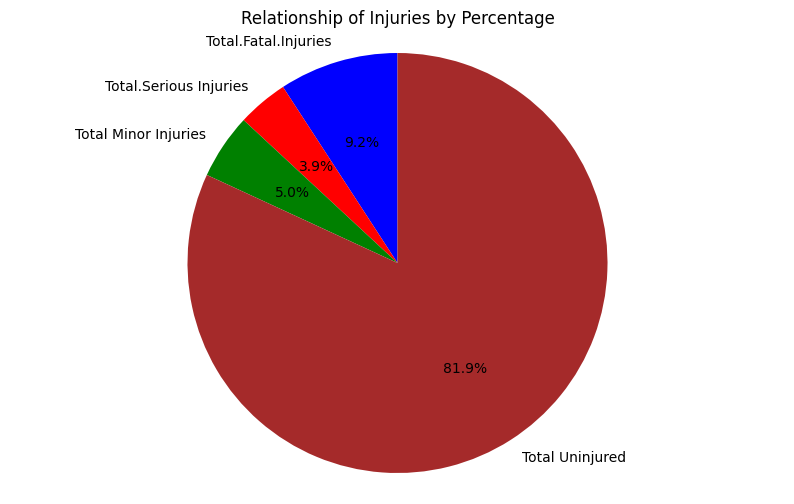

In [229]:
### PIE CHART
## i choose pie chart to show the relationship od injuries by percentages of each.
total_injuries = Aviation_df['Total.Fatal.Injuries'].sum() + Aviation_df['Total.Serious.Injuries'].sum() + Aviation_df['Total.Minor.Injuries'].sum() + Aviation_df['Total.Uninjured'].sum()
labels = ['Total.Fatal.Injuries', 'Total.Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']
colors = ['blue', 'red', 'green', 'brown']
plt.figure(figsize=(10,6))
plt.pie([Aviation_df['Total.Fatal.Injuries'].sum(), Aviation_df['Total.Serious.Injuries'].sum(), Aviation_df['Total.Minor.Injuries'].sum(), Aviation_df['Total.Uninjured'].sum()], labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
plt.title('Relationship of Injuries by Percentage')
plt.axis('equal')
plt.show()

Observation

Through this chart i found out that the  total percentage of uninjured individuals is higher than the rest indicating that there is safety in the operation of the aircraft.
where the uninjured had 64% and the fatal being a little bit higher than the rest.

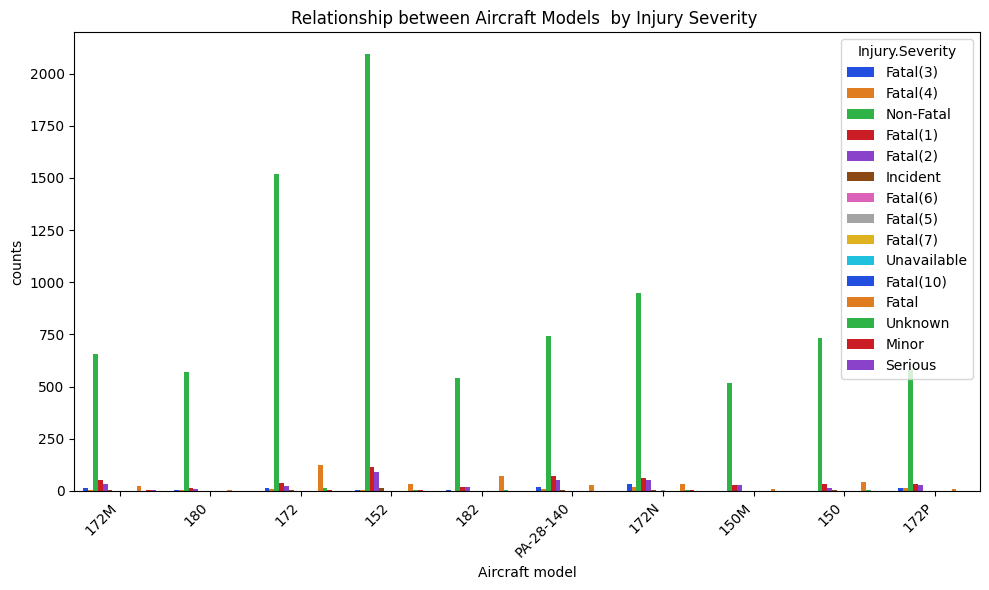

In [230]:
### Count Plot

top_10_models = Aviation_df.groupby('Model').size().nlargest(10).index
filtered_df = Aviation_df[Aviation_df['Model'].isin(top_10_models)]
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Model', hue='Injury.Severity', palette='bright')
plt.title('Relationship between Aircraft Models  by Injury Severity ')
plt.xlabel('Aircraft model')
plt.ylabel('counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Aircraft 152 has the highest number of Fatal injuries, at the same time it has the highest number of non-fatal injuries, so model 152 is very risky to purchase.

 Aircraft 182 has the least number of fatal injuries compared to the other models.



<ipython-input-232-a0c282b5e745>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=Aviation_df, x='Number.of.Engines', y='Injury.Severity', palette='bright')


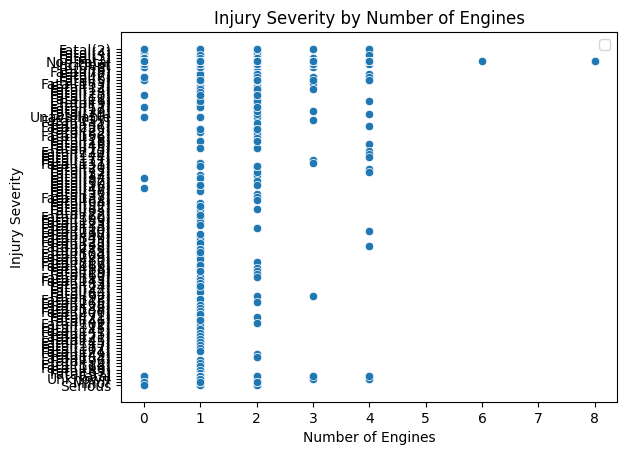

In [232]:
## Scatterplot

data ={
    'Number.of.Engines'
    'Injury.Severity'
}
sns.scatterplot(data=Aviation_df, x='Number.of.Engines', y='Injury.Severity', palette='bright')
plt.title('Injury Severity by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Injury Severity')
plt.legend()
plt.show()

From above plot we have found out  that Aircraft with one engine is more prone to accidents.

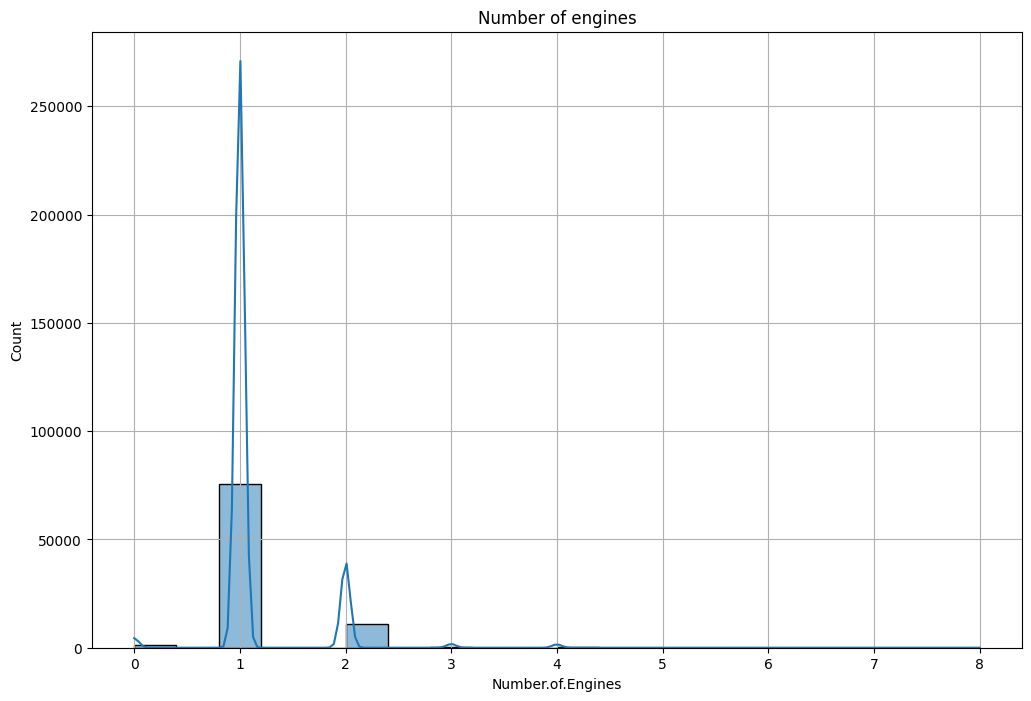

In [210]:
# Histogram
## i used histogram to find which number of engine was mostly used in the aircraft
plt.figure(figsize=(12,8))
sns.histplot(Aviation_df['Number.of.Engines'], bins=20,  kde=True)
plt.title('Number of engines')
plt.grid()
plt.show()

I have observed that most used number of engine is 1

In [233]:
## Group by Engine type and counts
accident_counts = Aviation_df.groupby('Engine.Type')['Accident.Number'].count()
   # Calculate total accidents
total_accidents = accident_counts.sum()
   # Calculate accident rates per model
accident_rates = (accident_counts / total_accidents) * 100
accident_rates

,Accident.Number
Engine.Type,
Electric,0.011250
Geared Turbofan,0.013500
Hybrid Rocket,0.001125
LR,0.002250
NONE,0.002250
Reciprocating,78.222912
Turbo Fan,2.791184
Turbo Jet,0.790892
Turbo Prop,3.814956


In [234]:
# create a new column named accident_rates
Aviation_df['Accident_rates']=Aviation_df['Engine.Type'].map(accident_rates)
Aviation_df

,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Accident_rates
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,78.222912
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,78.222912
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,1.0,Reciprocating,3.0,0.0,0.0,1.0,IMC,Cruise,78.222912
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,78.222912
4,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,1.0,Unknown,1.0,2.0,0.0,0.0,VMC,Approach,10.288344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,PIPER,PA-28-151,1.0,Unknown,0.0,1.0,0.0,0.0,Unknown,Unknown,10.288344
88885,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,BELLANCA,7ECA,1.0,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,10.288344
88886,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,Unknown,0.0,0.0,0.0,1.0,VMC,Unknown,10.288344
88887,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,CESSNA,210N,1.0,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,10.288344


In [235]:
## Aircraft with the highest accident rates
top_Engine = Aviation_df.sort_values(by=['Accident_rates'], ascending=False).head(10) # select the top ten engine type
top_Engine

,Accident.Number,Event.Date,Location,Country,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Accident_rates
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,78.222912
52563,LAX02FA157,2002-05-11,"El Cajon, CA",United States,Non-Fatal,Ercoupe (eng & Research Corp.),415C,1.0,Reciprocating,0.0,1.0,0.0,1.0,VMC,Approach,78.222912
52632,CHI02FA140,2002-05-23,"Anderson, IN",United States,Fatal(1),Schutte,Ms. Ryan Special,1.0,Reciprocating,1.0,0.0,0.0,1.0,VMC,Unknown,78.222912
52631,ATL02LA103,2002-05-23,"CHARLESTON, SC",United States,Non-Fatal,Mooney,M20J,1.0,Reciprocating,0.0,0.0,2.0,1.0,VMC,Climb,78.222912
52630,ATL02LA105,2002-05-23,"PANACEA, FL",United States,Non-Fatal,Stearman,A75N1,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Takeoff,78.222912
52629,ATL02LA106,2002-05-23,"HERNANDO, MS",United States,Non-Fatal,Beech,35,1.0,Reciprocating,0.0,0.0,4.0,1.0,VMC,Takeoff,78.222912
52627,CHI02LA141,2002-05-23,"GRAND MARAIS, MN",United States,Non-Fatal,Cessna,A185E,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Takeoff,78.222912
52625,SEA02FA085,2002-05-23,"MERLIN, OR",United States,Fatal(2),Robinson,R-22 Mariner,1.0,Reciprocating,2.0,0.0,0.0,1.0,VMC,Cruise,78.222912
52624,LAX02FA173,2002-05-22,"Mammoth Lakes, CA",United States,Fatal(2),Robinson,R22 Beta,1.0,Reciprocating,2.0,0.0,0.0,1.0,VMC,Climb,78.222912
52623,MIA02FA098,2002-05-22,"Mobile, AZ",United States,Fatal(1),Grob,G120A,1.0,Reciprocating,1.0,0.0,0.0,1.0,VMC,Maneuvering,78.222912


In [238]:
## The engine type counts
Engine_accident_counts = Aviation_df.groupby(['Engine.Type']).size().reset_index(name='Accident_Count')
Engine_accident_counts = Engine_accident_counts.sort_values(by='Accident_Count', ascending=False)
Engine_accident_counts

,Engine.Type,Accident_Count
5,Reciprocating,69530
11,Unknown,9145
9,Turbo Shaft,3609
8,Turbo Prop,3391
6,Turbo Fan,2481
7,Turbo Jet,703
1,Geared Turbofan,12
0,Electric,10
3,LR,2
4,NONE,2


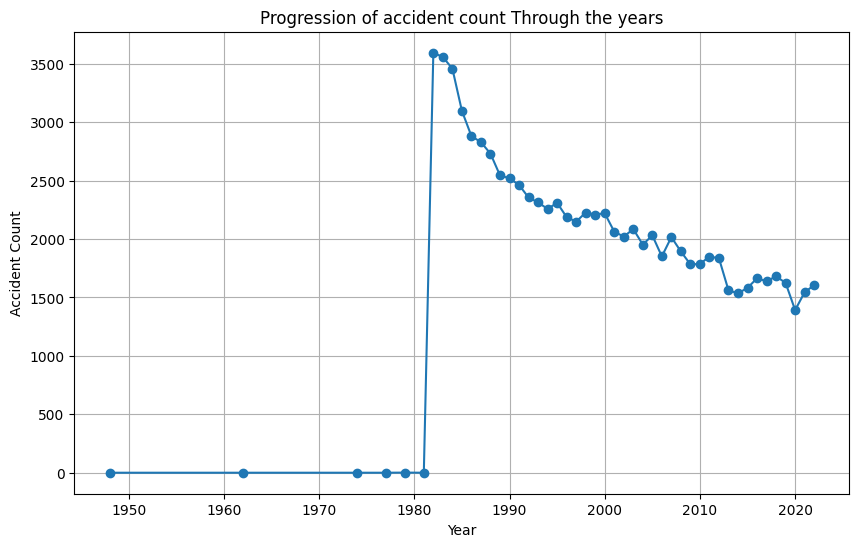

In [240]:
## Line Graph
Aviation_df['Event.Date'] = pd.to_datetime(Aviation_df['Event.Date'])
Aviation_df['Year'] = Aviation_df['Event.Date'].dt.year
plt.figure(figsize=(10,6))
Yearly_accident_rate = Aviation_df.groupby('Year').size()
Yearly_accident_rate.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Progression of accident count Through the years')
plt.grid(True)
plt.show()

We have found out that from 1950 to 1980  there was no accidents occurrence however between 1980 to 2020 increased rapidly but then dropped afterwards.

This shows that the old aircraft engine had a better make hence less prone to accidents which means that purchasing modern engines would be safe for the company.

# Limitation
Outdated dataset may lead to an incomplete conclusion.

incomplete dataset that is which contains missing values may affect the representativeness of the dataset which will not give the correct outputs.

# Findings



*   Aircraft model 182 has the lowest accidental rate and high safety regulations which makes it the safest model option.

*   Hybrid rocket and UNK exhibits low accident count which makes them  the safest and reliable options,  while  reciprocating engine type exhibits a very accident counts which means that the company should avoid this type of engines due to their high accidental rates.

